In [12]:
import pandas as pd
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('/home/gianni/Files/Studium/Master/04_FS2023/MT/f1tenth_development_gym/')
from SI_Toolkit.load_and_normalize import append_derivatives_to_df

In [17]:
file = f'./SI_Toolkit_ASF/Experiments/0_DNN/Recordings_high_mu_pp/Test/track_data.csv'
frame = pd.read_csv(file, skiprows=8)
exclude = ['WYPT', 'LIDAR', 'linear_vel_y', 'mu', 'pose_theta_']
frame = frame[[col for col in frame.columns if not any(tmp in col for tmp in exclude)]]
# frame.describe()

In [18]:
variables_for_derivative = ['pose_x',
                                'pose_y',
                                'pose_theta',
                                'linear_vel_x',
                                'angular_vel_z',
                                'slip_angle',
                                'steering_angle']
derivative_algorithm = "backward_difference"
frame = append_derivatives_to_df(frame, variables_for_derivative, derivative_algorithm)
frame.describe()


,time,translational_control_applied,angular_control_applied,translational_control,angular_control,pose_x,pose_y,pose_theta,linear_vel_x,angular_vel_z,slip_angle,steering_angle,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,49.980000,3.236848,-0.074120,3.236848,-0.074120,2.533202,-2.338192,-0.207244,3.149336,-0.456277,-0.013757,-0.072747,0.118303,-0.029868,-0.015498,0.021617,-0.018214,-0.000646,-0.003026
std,28.850192,1.002168,0.177984,1.002168,0.177984,6.276730,2.167499,1.955318,0.976866,1.062947,0.041758,0.142237,2.971497,1.424429,14.983771,1.352157,10.522780,0.362469,1.242065
min,0.040000,1.612990,-0.662090,1.612990,-0.662090,-6.129280,-5.704480,-3.138450,0.180200,-4.153350,-0.151500,-0.427990,-4.294500,-2.164000,-156.419000,-6.482500,-43.947250,-2.277000,-3.200000
25%,25.010000,2.377618,-0.183220,2.377618,-0.183220,-3.601348,-4.224778,-2.170220,2.308045,-1.179137,-0.033070,-0.158532,-2.654938,-1.278937,-1.170562,-0.471125,-5.988875,-0.170250,-0.801187
50%,49.980000,3.175675,-0.072845,3.175675,-0.072845,2.074920,-2.890630,-0.113950,3.082095,-0.567540,-0.008180,-0.067030,-0.715875,-0.266000,-0.550125,0.425875,0.068000,0.002750,0.016750
75%,74.950000,3.949838,0.039443,3.949838,0.039443,8.832642,-0.004587,1.217348,3.835470,0.159310,0.010340,0.020248,2.858313,1.181437,0.169938,0.804438,5.603250,0.172062,0.761313
max,99.920000,7.025610,0.548750,7.025610,0.548750,11.850110,0.960390,3.141090,5.386120,4.571650,0.190250,0.397990,5.379250,2.629500,156.676500,9.010000,47.131500,2.297750,3.200000


In [3]:
# path = f'../SI_Toolkit_ASF/Experiments/Experiment-9/Recordings/Train/*.csv'
# files = glob.glob(path)
# dfs = []
# for file in files:
#     dfs.append(pd.read_csv(file, skiprows=8))
# initial_frame = pd.concat(dfs, axis=0, ignore_index=True)
# exclude = ['WYPT', 'LIDAR', 'linear_vel_y', 'mu', 'pose_theta_']
# initial_frame = initial_frame[[col for col in initial_frame.columns if not any(tmp in col for tmp in exclude)]]
# # initial_frame.describe()

In [4]:
# for df in dfs:
#     print(df.groupby('experiment_index').size())

# Some Plots

<AxesSubplot:>

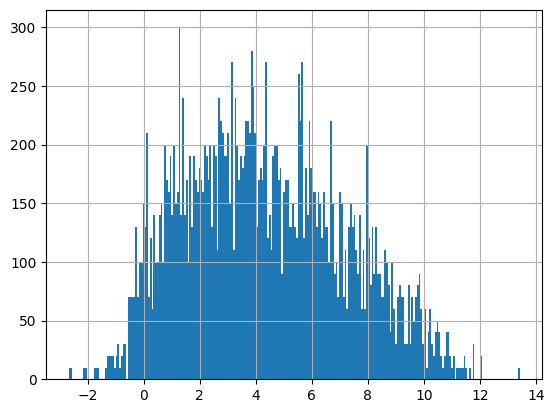

In [5]:
frame.translational_control.hist(bins=250)

<AxesSubplot:>

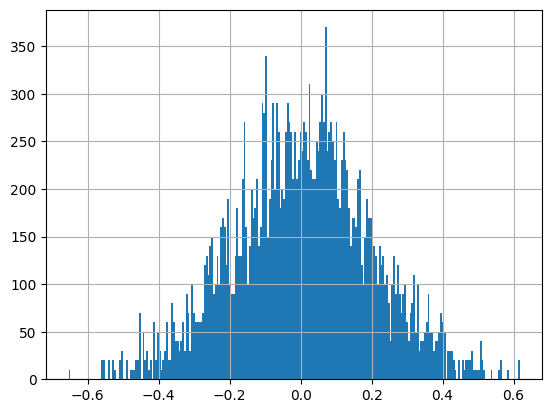

In [6]:
frame.angular_control.hist(bins=250)

<AxesSubplot:>

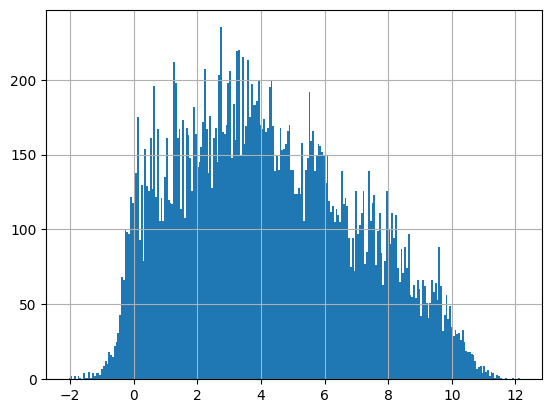

In [7]:
frame.linear_vel_x.hist(bins=250)

<AxesSubplot:>

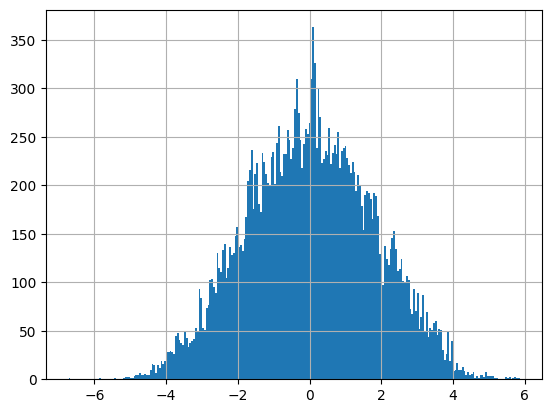

In [8]:
frame.angular_vel_z.hist(bins=250)

<AxesSubplot:>

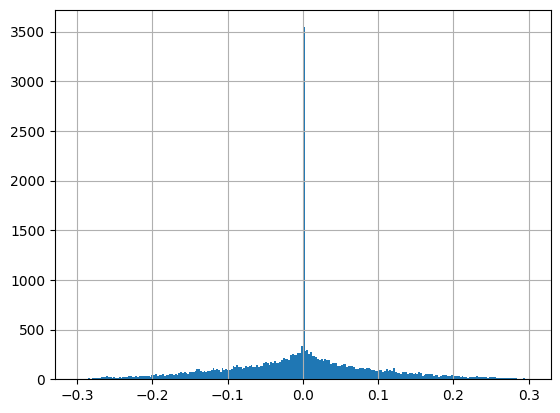

In [9]:
frame.slip_angle.hist(bins=250)

## Delta values

In [10]:
delta_frame = frame[frame.time != 0.04]

<AxesSubplot:>

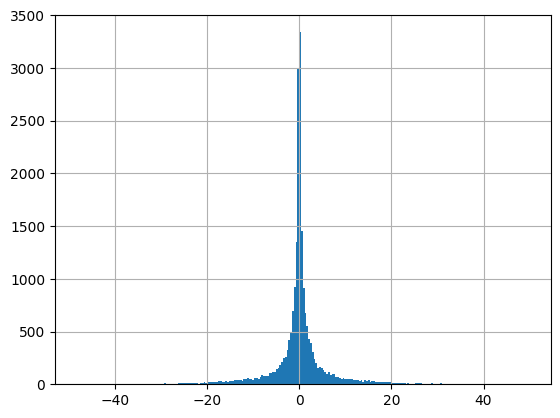

In [11]:
delta_frame.D_angular_vel_z.hist(bins=250)

<AxesSubplot:>

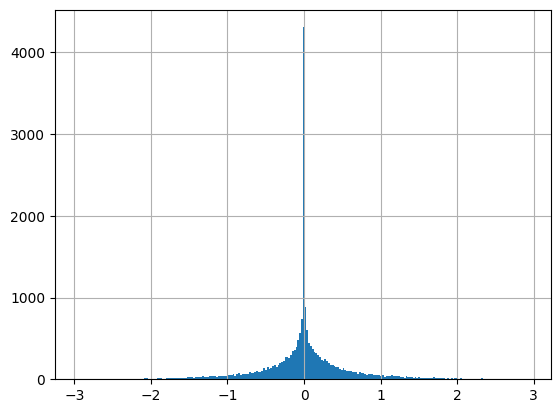

In [12]:
delta_frame.D_slip_angle.hist(bins=250)

<AxesSubplot:>

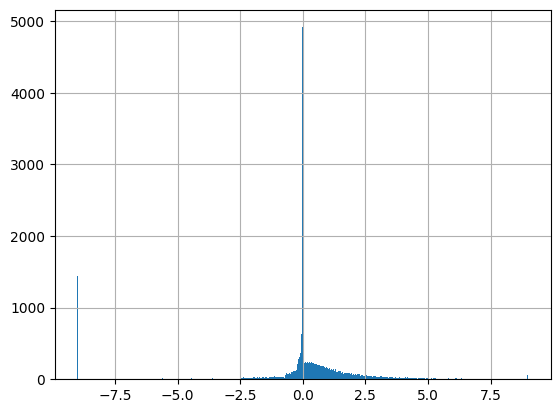

In [13]:
frame.D_linear_vel_x.hist(bins=500)

# Explore linear velocity

In [19]:
# frame[frame.D_linear_vel_x > 9.01]

In [15]:
# high_D_lin = frame[frame.experiment_index == 2530]
# high_D_lin

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle


# Explore slip angle

In [16]:
delta_frame[abs(delta_frame.D_slip_angle) > 5]

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle


In [17]:
high_acc = frame[frame.experiment_index == 2026]
high_acc

,time,angular_control,translational_control,angular_vel_z,linear_vel_x,pose_theta,pose_x,pose_y,slip_angle,steering_angle,experiment_index,D_pose_x,D_pose_y,D_pose_theta,D_linear_vel_x,D_angular_vel_z,D_slip_angle,D_steering_angle


<AxesSubplot:xlabel='pose_x'>

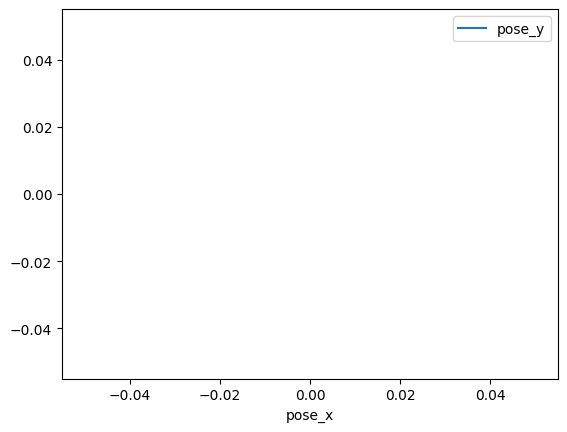

In [18]:
high_acc.plot(x='pose_x', y='pose_y')